In [1]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

from matplotlib import rc
rc('text', usetex=True)
rc('text.latex', preamble=[r'\usepackage{sansmath}', r'\sansmath']) #r'\usepackage{DejaVuSans}'
rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans']})

rc('xtick.major', pad=12)
rc('ytick.major', pad=12)
rc('grid', linewidth=1.3)


%matplotlib inline

<ipython-input-1-3a4983def31d>:7: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  rc('text.latex', preamble=[r'\usepackage{sansmath}', r'\sansmath']) #r'\usepackage{DejaVuSans}'


In [2]:
import cmocean

In [3]:


# onp.savez("augmentation_ce_fit_03",
#           x_train=train_set[0][0],
#           y_train=train_set[1][0],
#           x_test=test_set[0][0],
#           y_test=test_set[1][0],
#           grid_d1=grid_d1,
#           grid_d2=grid_d2,
#           all_grid_preds=all_grid_preds,
#           all_test_preds=all_test_preds
#          )

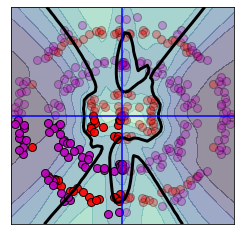

In [20]:
arr = np.load("augmentation_ce_fit_03.npz")

levels = np.linspace(0., 1., 10)
grid_preds = arr["all_grid_preds"][10:].mean(0)[:, 0].reshape((50, 50))

plt.figure(figsize=(4, 4))
plt.contourf(
    arr["grid_d1"], arr["grid_d2"], grid_preds,
    vmin=0., vmax=1., levels=levels, cmap=cmocean.cm.deep,
    alpha=0.5#cmap=cmocean.cm.thermal
)
# plt.colorbar()


class_1 = (arr["y_train"] == 1)
class_0 = np.logical_not(class_1)
mask = np.logical_and(arr["x_train"][:, 0] < 0, arr["x_train"][:, 1] < 0)
plt.plot(arr["x_train"][:, 0][mask & class_1], arr["x_train"][:, 1][mask & class_1], "ro", ms=8, mec="k", alpha=0.9)
plt.plot(arr["x_train"][:, 0][mask & class_0], arr["x_train"][:, 1][mask & class_0], "mo", ms=8, mec="k", alpha=0.9)
plt.plot(arr["x_train"][:, 0][~mask & class_1], arr["x_train"][:, 1][~mask & class_1], "ro", ms=8, mec="k", alpha=0.3)
plt.plot(arr["x_train"][:, 0][~mask & class_0], arr["x_train"][:, 1][~mask & class_0], "mo", ms=8, mec="k", alpha=0.3)

plt.contour(
    arr["grid_d1"], arr["grid_d2"], grid_preds,
    levels=[0.5], colors=["k"], zorder=10, linewidths=3
)
plt.xticks([])
plt.yticks([])

# test_acc = (np.argmax(arr["all_test_preds"][10:].mean(axis=0), -1) == arr["y_test"]).mean()
# plt.title("Test Acc: {:.1f}\%".format(test_acc * 100), fontsize=18)

# plt.hlines(0., -15., 0., color="b", ls="solid", zorder=10, lw=3)
# plt.vlines(0., -15., 0., color="b", ls="solid", zorder=10, lw=3)
# plt.hlines(0., -15., 0., color="k", ls="dashed", zorder=10, lw=3)
# plt.vlines(0., -15., 0., color="k", ls="dashed", zorder=10, lw=3)
plt.hlines(0., -15., 15., color="b", ls="solid", zorder=10, lw=1.5)
plt.vlines(0., -15., 15., color="b", ls="solid", zorder=10, lw=1.5)
plt.savefig("../../Papers/data_aug_bnns/arxiv/figures/fig_1/ce_aug_fit.pdf")



# class_1 = (test_set[1][0] == 1)
# class_0 = jnp.logical_not(class_1)
# plt.plot(test_set[0][0, :, 0][class_1], test_set[0][0, :, 1][class_1], "rs", ms=10, mec="k")
# plt.plot(test_set[0][0, :, 0][class_0], test_set[0][0, :, 1][class_0], "ms", ms=10, mec="k")

# plt.xlim(-15., 0.)
# plt.ylim(-15., 0.)

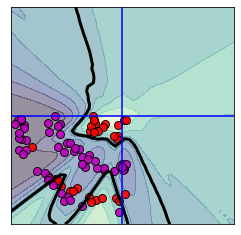

In [19]:
arr = np.load("ce_fit_noaug_03.npz")

levels = np.linspace(0., 1., 10)
grid_preds = arr["all_grid_preds"][10:].mean(0)[:, 0].reshape((50, 50))

plt.figure(figsize=(4, 4))
plt.contourf(
    arr["grid_d1"], arr["grid_d2"], grid_preds,
    vmin=0., vmax=1., levels=levels, cmap=cmocean.cm.deep,
    alpha=0.5#cmap=cmocean.cm.thermal
)
# plt.colorbar()


class_1 = (arr["y_train"] == 1)
class_0 = np.logical_not(class_1)
plt.plot(arr["x_train"][:, 0][class_1], arr["x_train"][:, 1][class_1], "ro", ms=8, mec="k", alpha=0.9)
plt.plot(arr["x_train"][:, 0][class_0], arr["x_train"][:, 1][class_0], "mo", ms=8, mec="k", alpha=0.9)

plt.contour(
    arr["grid_d1"], arr["grid_d2"], grid_preds,
    levels=[0.5], colors=["k"], zorder=10, linewidths=3
)
plt.xticks([])
plt.yticks([])

plt.hlines(0., -15., 15., color="b", ls="solid", zorder=10, lw=1.5)
plt.vlines(0., -15., 15., color="b", ls="solid", zorder=10, lw=1.5)
# plt.hlines(0., -15., 15., color="k", ls="dashed", zorder=10, lw=1)
# plt.vlines(0., -15., 15., color="k", ls="dashed", zorder=10, lw=1)

# test_acc = (np.argmax(arr["all_test_preds"][10:].mean(axis=0), -1) == arr["y_test"]).mean()
# plt.title("Test Acc: {:.1f}\%".format(test_acc * 100), fontsize=18)

plt.savefig("../../Papers/data_aug_bnns/arxiv/figures/fig_1/ce_noaug_fit.pdf")

# class_1 = (test_set[1][0] == 1)
# class_0 = jnp.logical_not(class_1)
# plt.plot(test_set[0][0, :, 0][class_1], test_set[0][0, :, 1][class_1], "rs", ms=10, mec="k")
# plt.plot(test_set[0][0, :, 0][class_0], test_set[0][0, :, 1][class_0], "ms", ms=10, mec="k")

# plt.xlim(-15., 0.)
# plt.ylim(-15., 0.)

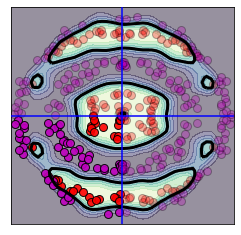

In [18]:
arr = np.load("augmentation_ce_fit_03_cold.npz")

levels = np.linspace(0., 1., 10)
grid_preds = arr["all_grid_preds"][10:].mean(0)[:, 0].reshape((50, 50))

plt.figure(figsize=(4, 4))
plt.contourf(
    arr["grid_d1"], arr["grid_d2"], grid_preds,
    vmin=0., vmax=1., levels=levels, cmap=cmocean.cm.deep,
    alpha=0.5#cmap=cmocean.cm.thermal
)
# plt.colorbar()


class_1 = (arr["y_train"] == 1)
class_0 = np.logical_not(class_1)
mask = np.logical_and(arr["x_train"][:, 0] < 0, arr["x_train"][:, 1] < 0)
plt.plot(arr["x_train"][:, 0][mask & class_1], arr["x_train"][:, 1][mask & class_1], "ro", ms=8, mec="k", alpha=0.9)
plt.plot(arr["x_train"][:, 0][mask & class_0], arr["x_train"][:, 1][mask & class_0], "mo", ms=8, mec="k", alpha=0.9)
plt.plot(arr["x_train"][:, 0][~mask & class_1], arr["x_train"][:, 1][~mask & class_1], "ro", ms=8, mec="k", alpha=0.3)
plt.plot(arr["x_train"][:, 0][~mask & class_0], arr["x_train"][:, 1][~mask & class_0], "mo", ms=8, mec="k", alpha=0.3)

plt.contour(
    arr["grid_d1"], arr["grid_d2"], grid_preds,
    levels=[0.5], colors=["k"], zorder=10, linewidths=3
)
plt.xticks([])
plt.yticks([])

plt.hlines(0., -15., 15., color="b", ls="solid", zorder=10, lw=1.5)
plt.vlines(0., -15., 15., color="b", ls="solid", zorder=10, lw=1.5)
# plt.hlines(0., -15., 15., color="k", ls="dashed", zorder=10, lw=1)
# plt.vlines(0., -15., 15., color="k", ls="dashed", zorder=10, lw=1)

# test_acc = (np.argmax(arr["all_test_preds"][10:].mean(axis=0), -1) == arr["y_test"]).mean()
# plt.title("Test Acc: {:.1f}\%".format(test_acc * 100), fontsize=18)

plt.savefig("../../Papers/data_aug_bnns/arxiv/figures/fig_1/ce_aug_cold_fit.pdf")

# class_1 = (test_set[1][0] == 1)
# class_0 = jnp.logical_not(class_1)
# plt.plot(test_set[0][0, :, 0][class_1], test_set[0][0, :, 1][class_1], "rs", ms=10, mec="k")
# plt.plot(test_set[0][0, :, 0][class_0], test_set[0][0, :, 1][class_0], "ms", ms=10, mec="k")

# plt.xlim(-15., 0.)
# plt.ylim(-15., 0.)

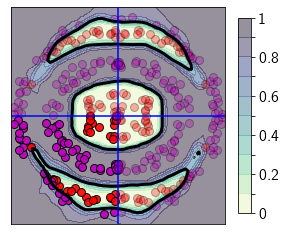

In [17]:
arr = np.load("augmentation_dirichlet_fit.npz")

levels = np.linspace(0., 1., 11)
grid_preds = arr["all_grid_preds"][10:].mean(0)[:, 0].reshape((50, 50))

plt.figure(figsize=(4.8, 4))
plt.contourf(
    arr["grid_d1"], arr["grid_d2"], grid_preds,
    vmin=0., vmax=1., levels=levels, cmap=cmocean.cm.deep,
    alpha=0.5#cmap=cmocean.cm.thermal
)
cbar = plt.colorbar(pad=0.05, aspect=15, shrink=0.9)
# cbar.ax.tick_params(labelsize=16)
# cbar = plt.colorbar(orientation="horizontal", pad=0.05, aspect=10, shrink=0.9)
cbar.set_ticks(levels)
cbar.ax.set_yticklabels(
    [r"$0$", "", "$0.2$", "", "$0.4$", "", "$0.6$", "", "$0.8$", "", "$1$"], fontsize=16)
cbar.ax.tick_params(axis='both', which='major', pad=4)


class_1 = (arr["y_train"] == 1)
class_0 = np.logical_not(class_1)
mask = np.logical_and(arr["x_train"][:, 0] < 0, arr["x_train"][:, 1] < 0)
plt.plot(arr["x_train"][:, 0][mask & class_1], arr["x_train"][:, 1][mask & class_1], "ro", ms=8, mec="k", alpha=0.9)
plt.plot(arr["x_train"][:, 0][mask & class_0], arr["x_train"][:, 1][mask & class_0], "mo", ms=8, mec="k", alpha=0.9)
plt.plot(arr["x_train"][:, 0][~mask & class_1], arr["x_train"][:, 1][~mask & class_1], "ro", ms=8, mec="k", alpha=0.3)
plt.plot(arr["x_train"][:, 0][~mask & class_0], arr["x_train"][:, 1][~mask & class_0], "mo", ms=8, mec="k", alpha=0.3)

plt.contour(
    arr["grid_d1"], arr["grid_d2"], grid_preds,
    levels=[0.5], colors=["k"], zorder=10, linewidths=3
)
plt.xticks([])
plt.yticks([])


# test_acc = (np.argmax(arr["all_test_preds"][10:].mean(axis=0), -1) == arr["y_test"]).mean()
# plt.title("Test Acc: {:.1f}\%".format(test_acc * 100), fontsize=18)

plt.hlines(0., -15., 15., color="b", ls="solid", zorder=10, lw=1.5)
plt.vlines(0., -15., 15., color="b", ls="solid", zorder=10, lw=1.5)
plt.savefig("../../Papers/data_aug_bnns/arxiv/figures/fig_1/dirichlet_aug_fit.pdf")

# class_1 = (test_set[1][0] == 1)
# class_0 = jnp.logical_not(class_1)
# plt.plot(test_set[0][0, :, 0][class_1], test_set[0][0, :, 1][class_1], "rs", ms=10, mec="k")
# plt.plot(test_set[0][0, :, 0][class_0], test_set[0][0, :, 1][class_0], "ms", ms=10, mec="k")

# plt.xlim(-15., 0.)
# plt.ylim(-15., 0.)